# Visualization of 2D Correlated DG & TN Samples
@author: Ofer Shir, oshir@alumni.Princeton.EDU

## Naive first attempt: $\sigma \leadsto S$

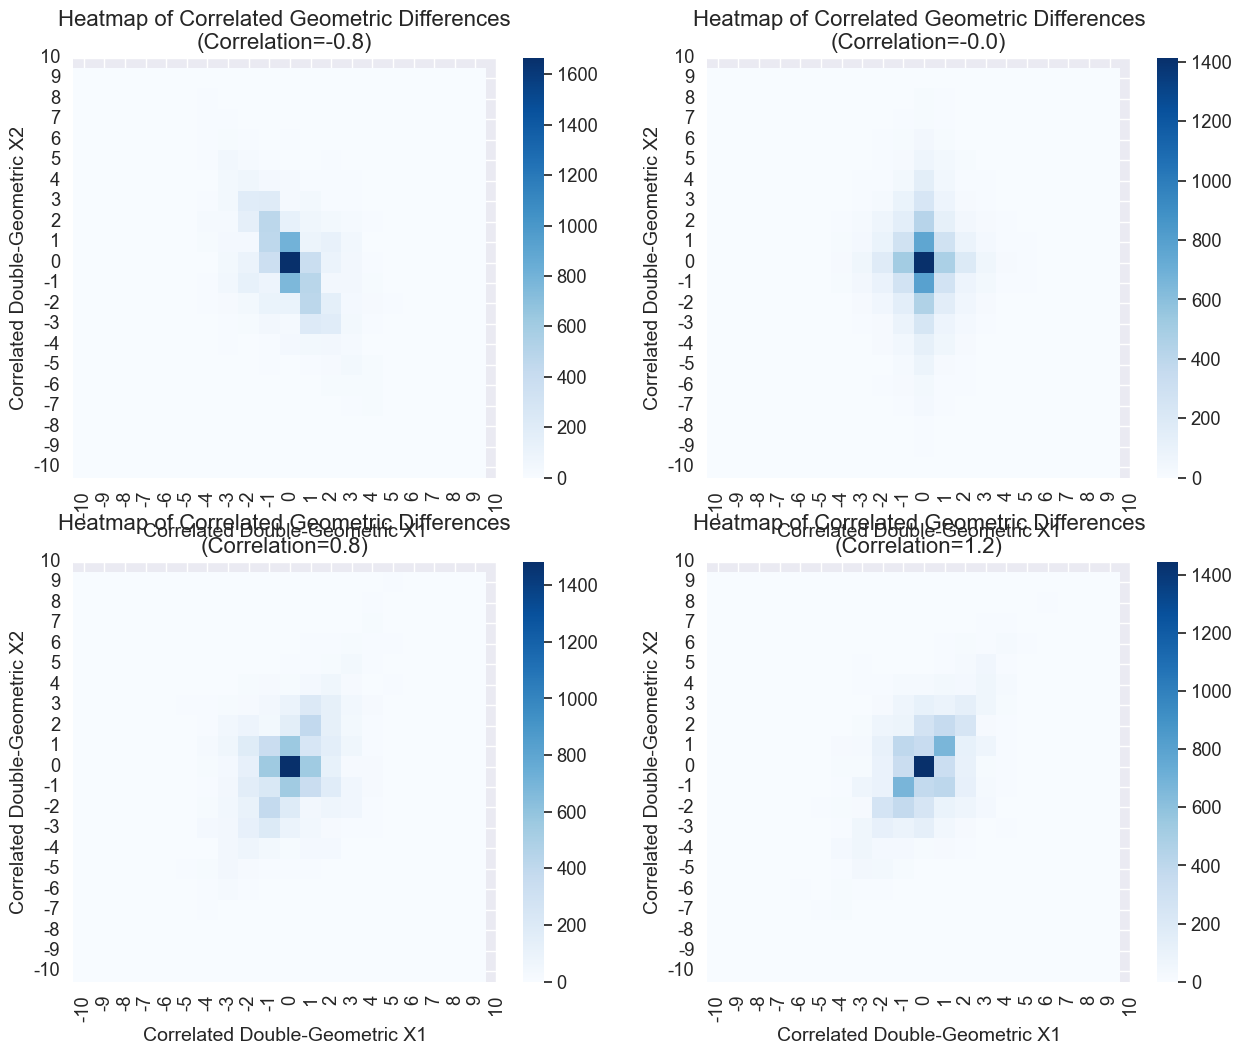

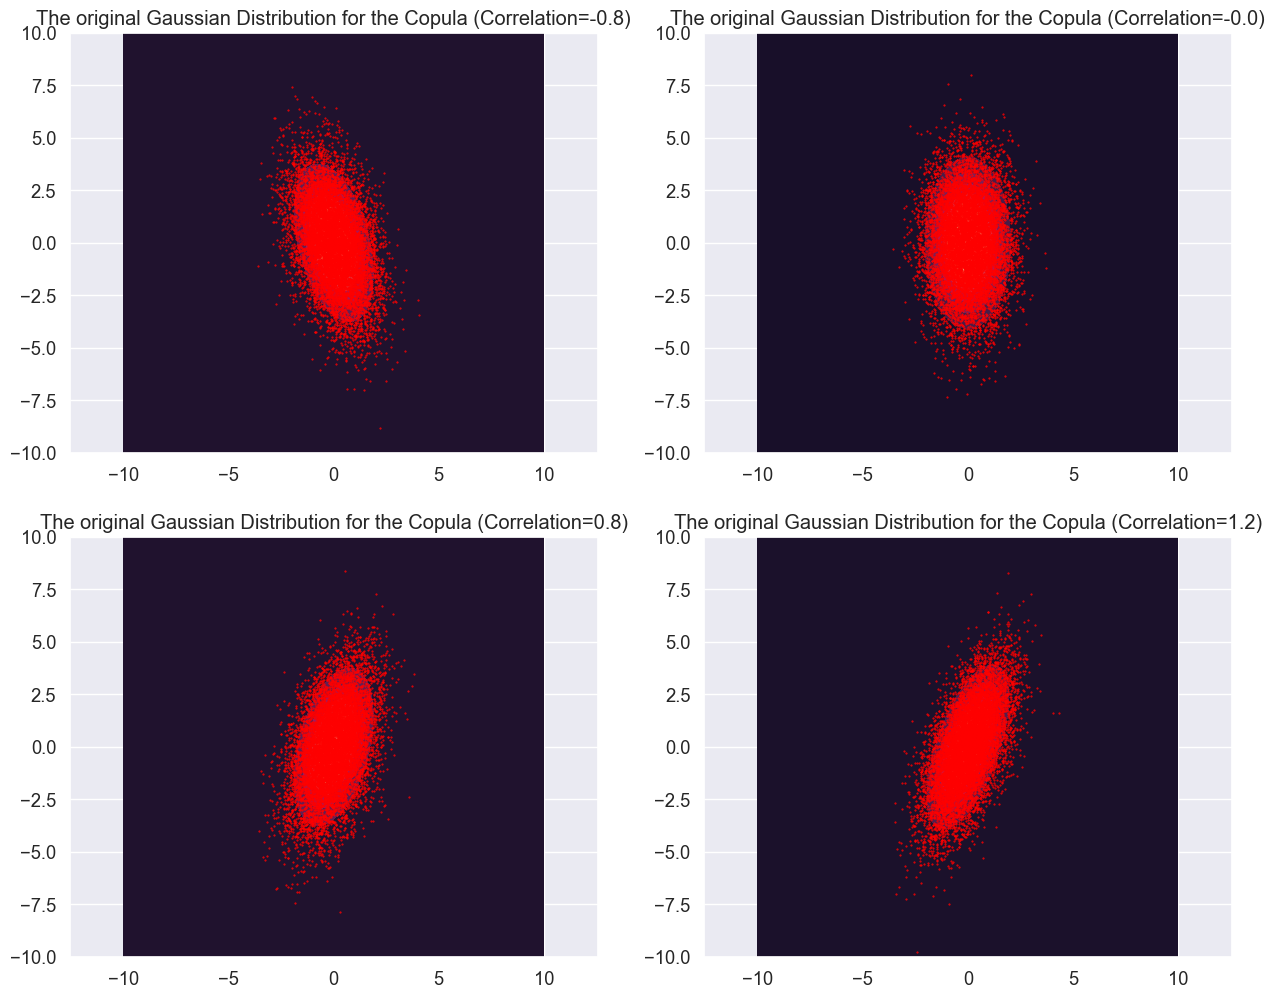

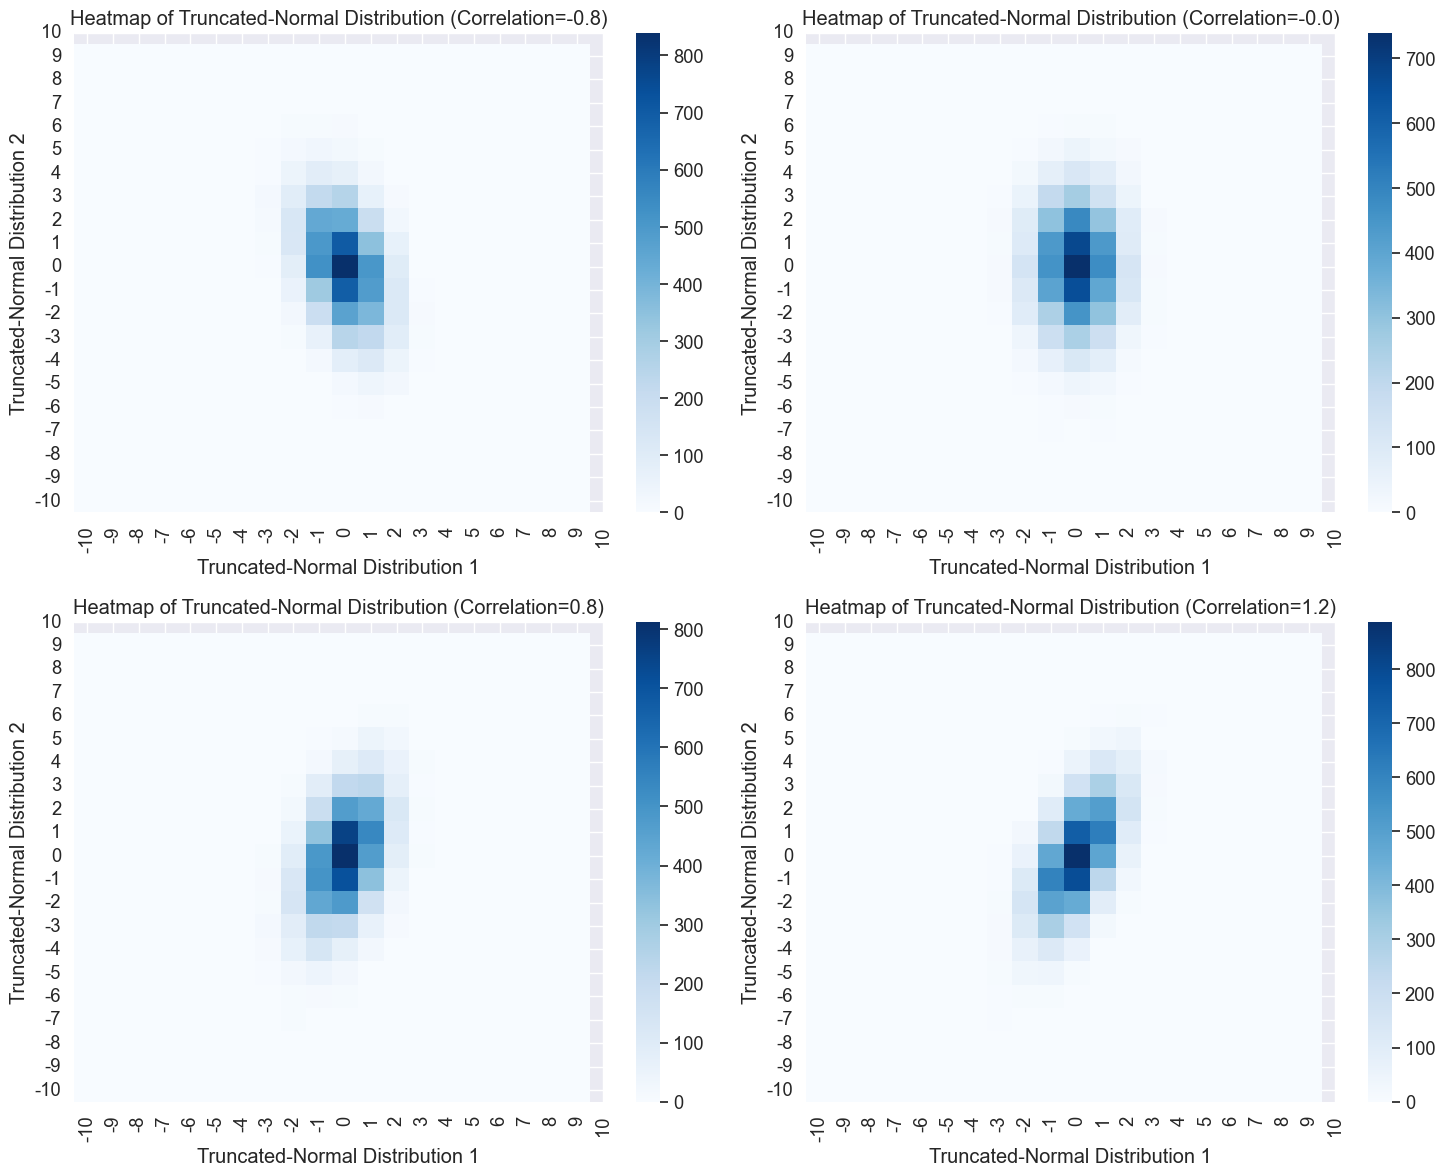

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
num_samples = 10000  # Number of samples
nz = 2 #np.sqrt(2) #dimension
# Define a range of positive and negative correlation values
# correlation_values = [-0.8, -0.0, 0.8, 1.2]  # Negative and positive correlations included
correlation_values = np.array([-0.8, -0.0, 0.8, 1.2])
c11,c22 = 1.0, 2.0 #1.441
angles = 0.5 * np.arctan(2 * correlation_values / (c11 - c22))  # 

S1 = 1*np.sqrt(2.0/(np.pi))*c11 #(c11/nz) with nz=np.sqrt(2)
S2 = 1*np.sqrt(2.0/(np.pi))*c22 #(c22/nz) with nz=np.sqrt(2)
# Set parameters for the geometric distributions - following the transformation S==>p per S=1.0 and n=2
p1 = 1.0 - ( S1 / (1.0+np.sqrt(1+(S1**2))) )
p2 = 1.0 - ( S2 / (1.0+np.sqrt(1+(S2**2))) )

# Set up plot parameters for better visibility
sns.set_theme(font_scale=1.2)  # Increase font size

# Create a subplot for each correlation value with heatmap and 3D histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection': None})
axes = axes.flatten()
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
axes2 = axes2.flatten()
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))
axes3 = axes3.flatten()
mu = np.array([0., 0.])
lowerB,upperB = -10,10
step = 0.05
x = np.arange(lowerB, upperB+step, step)
y = np.arange(lowerB, upperB+step, step)
xx, yy = np.meshgrid(x, y)
# Pack X and Y into a single 3-dimensional array
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx
pos[:, :, 1] = yy


for i, corr in enumerate(correlation_values):
    # Generate independent geometric samples Z11, Z12, Z21, and Z22
    # c12 = corr #0.5 * (sigma1**2 - sigma2**2) * np.tan(2 * alpha12[0])
    theta = np.array([0.5 * np.arctan(2 * corr / (c11 - c22))])
    DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta)

    # Generate correlated uniform samples using the copula
    Sigma = np.array([[ c11**2 , corr], [corr,  c22**2]])
    # Sigma = cov_to_scaled_matrix(Sigma0)
    F = multivariate_normal(mu, Sigma)
    Z = F.pdf(pos)
    normal_samples = np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
        
    # Create a 2D histogram for the joint distribution, with bins covering -10 to 10
    bins_range = range(-10, 11)  # Bins from -10 to 10 inclusive
    heatmap_data, x_edges, y_edges = np.histogram2d(DG_samples[:, 0], DG_samples[:, 1], bins=[bins_range, bins_range])
    # Plot heatmap
    sns.heatmap(heatmap_data.T,cmap="Blues",cbar=True,annot=False,fmt="g",ax=axes[i],xticklabels=bins_range,yticklabels=bins_range,)
    axes[i].set_title(f"Heatmap of Correlated Geometric Differences\n(Correlation={corr})",fontsize=16,)
    axes[i].set_xlabel("Correlated Double-Geometric X1", fontsize=14)
    axes[i].set_ylabel("Correlated Double-Geometric X2", fontsize=14)
    axes[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    axes[i].invert_yaxis()  # To match the orientation of the heatmap with the axes
    #print("NORMAL DISTRIBUTION ================>")
    # 2. plot the underlying normal distributions
    axes2[i].contourf(xx,yy,Z) #, levels=np.linspace(0, 1.0, 11))
    axes2[i].scatter(normal_samples[:, 0], normal_samples[:, 1], color='red', s=0.25)
    axes2[i].grid(True)
    axes2[i].axis('equal')
    axes2[i].set_title(f"The original Gaussian Distribution for the Copula (Correlation={corr})")
    # 3. plot the truncated mutations
    heatmap_data, x_edges, y_edges = np.histogram2d(np.round(normal_samples[:, 0]), np.round(normal_samples[:, 1]),bins=[bins_range, bins_range]) #range(-5, 5))
    sns.heatmap(heatmap_data.T, cmap="Blues", cbar=True, annot=False, fmt="g", ax=axes3[i],xticklabels=bins_range, yticklabels=bins_range)
    axes3[i].set_title(f"Heatmap of Truncated-Normal Distribution (Correlation={corr})")
    axes3[i].set_xlabel("Truncated-Normal Distribution 1")
    axes3[i].set_ylabel("Truncated-Normal Distribution 2")
    axes3[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes3[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    axes3[i].invert_yaxis()  # To match the orientation of the heatmap with the axes

# Adjust layout for clear visualization
plt.tight_layout()
plt.show()


## The right way: $S \leadsto \sigma$

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3229445135.py:17: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3229445135.py:17: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3229445135.py:17: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]


Entropy per $	heta$ = 0.0
TN: 
Multivariate histogram-based entropy estimate: 5.8075 bits
DG: 
Multivariate histogram-based entropy estimate: 5.9683 bits
Entropy per $	heta$ = 0.39269908169872414
TN: 
Multivariate histogram-based entropy estimate: 5.7783 bits
DG: 
Multivariate histogram-based entropy estimate: 6.0501 bits
Entropy per $	heta$ = 0.7853981633974483
TN: 
Multivariate histogram-based entropy estimate: 5.7800 bits
DG: 
Multivariate histogram-based entropy estimate: 5.8680 bits
Entropy per $	heta$ = 1.5707963267948966
TN: 
Multivariate histogram-based entropy estimate: 5.7736 bits
DG: 
Multivariate histogram-based entropy estimate: 5.9802 bits


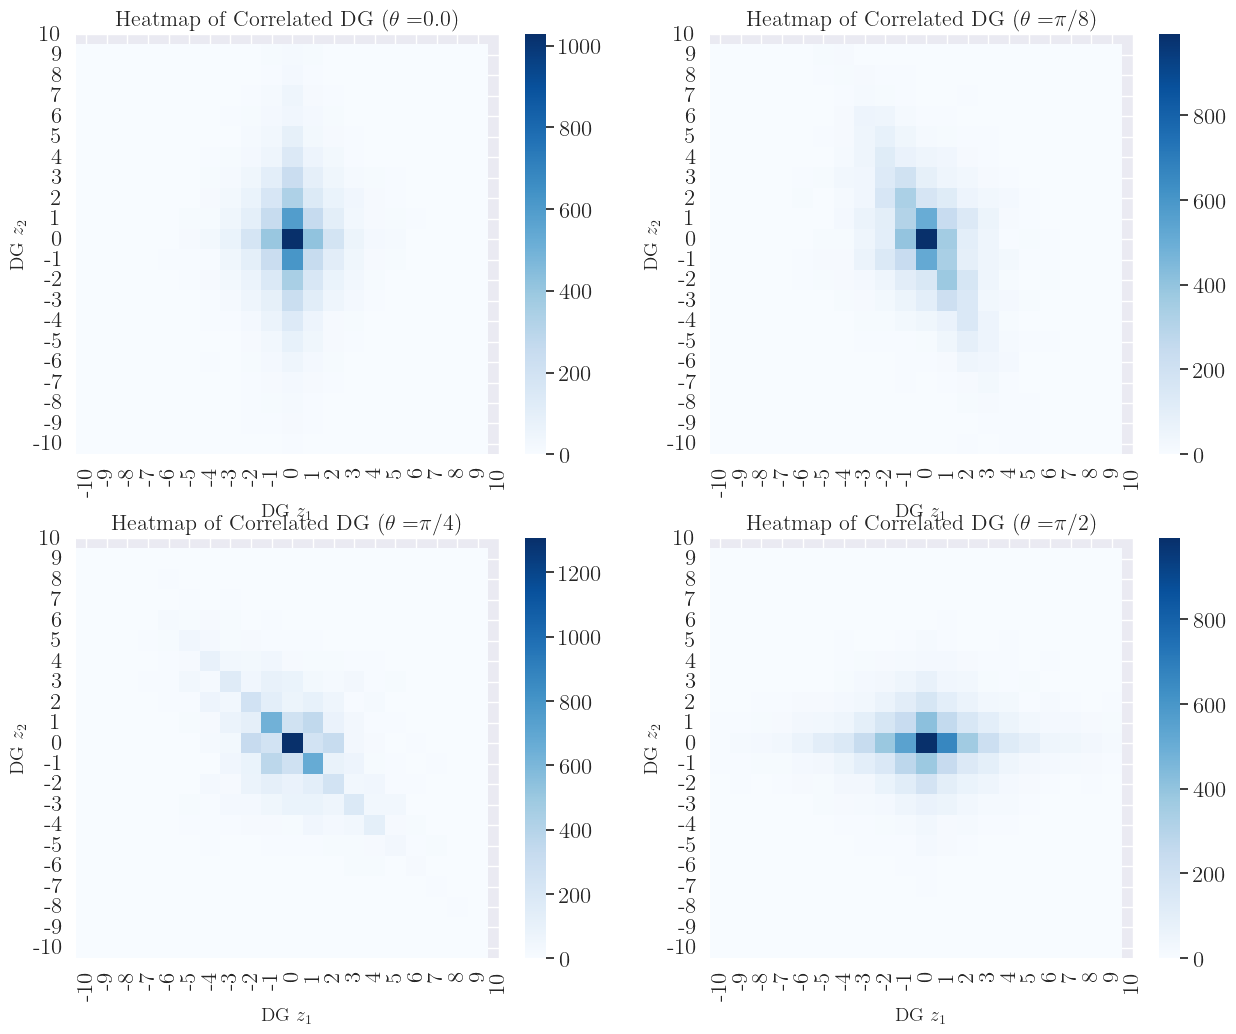

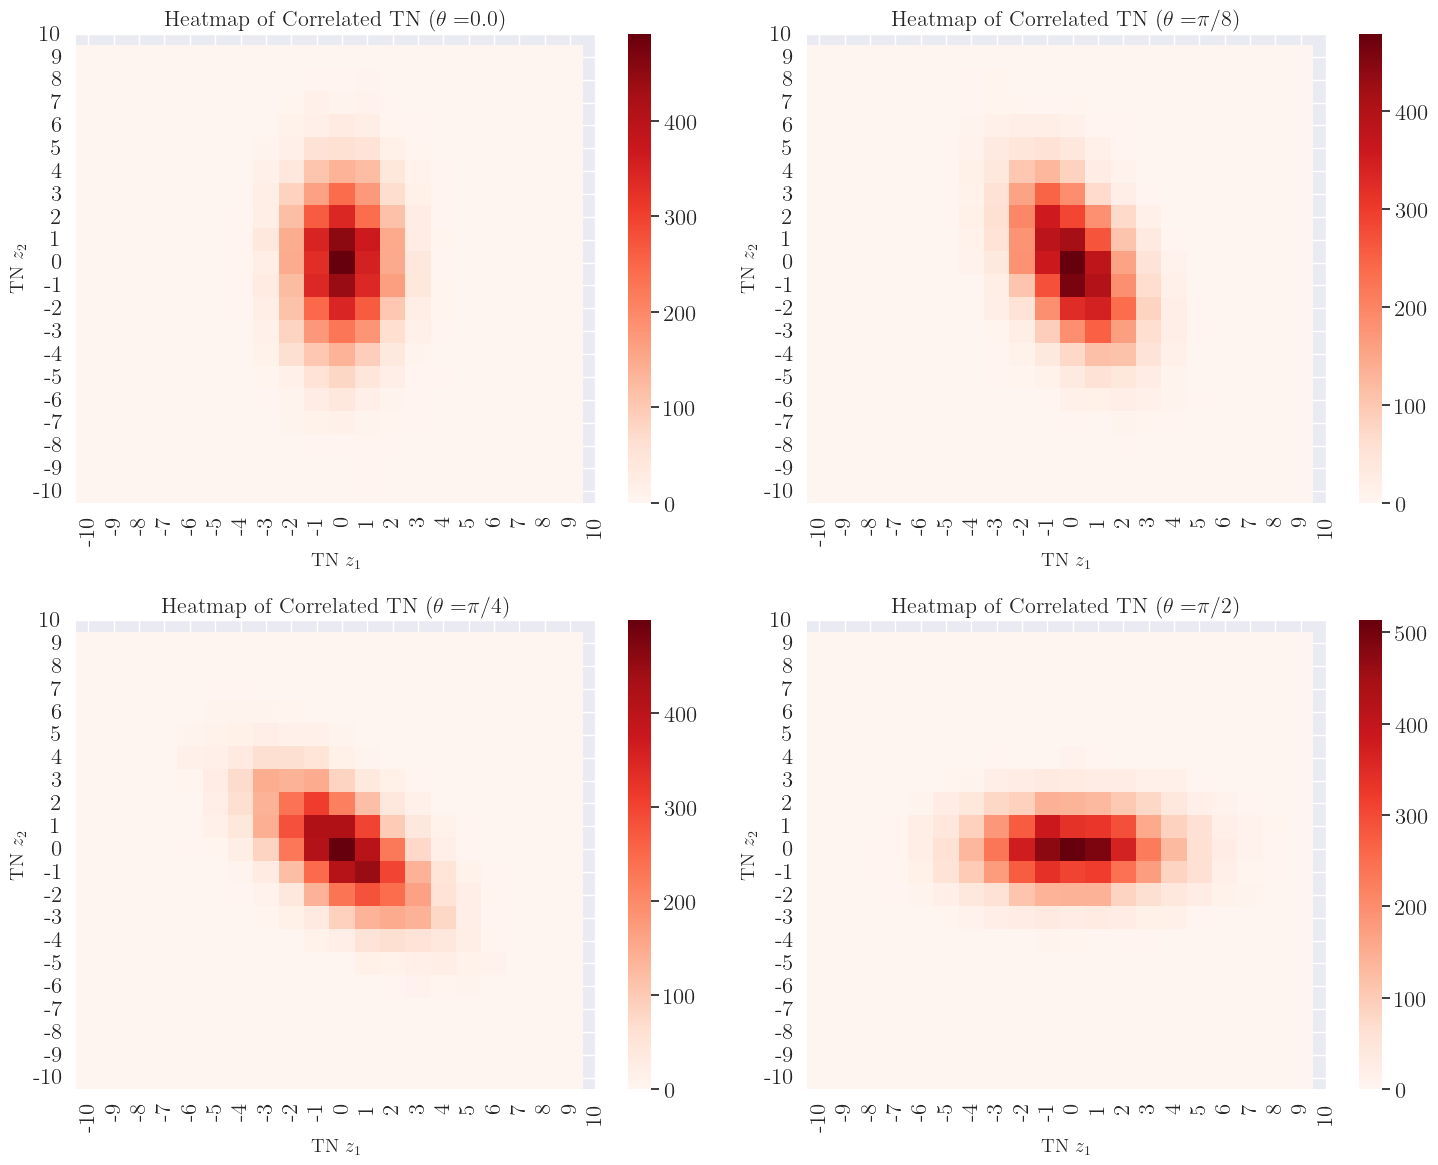

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
num_samples = 10000  # Number of samples
nz = 2 #np.sqrt(2) #dimension
# Define a range of positive and negative correlation values
# correlation_values = [-0.8, -0.0, 0.8, 1.2]  # Negative and positive correlations included
# correlation_values = np.array([-0.8, -0.0, 0.8, 1.2])
# c11,c22 = 1.0, 2.0 #1.441
# angles = 0.5 * np.arctan(2 * correlation_values / (c11 - c22))  # 

# S_values = np.array([1, 2, 3, 4, 5, 6]) #2.0*(1.0-p_values)/(p_values*(2-p_values))
theta_values = np.array([0.0,np.pi/8,np.pi/4,np.pi/2])
theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]

S1 = 1.0 #1*np.sqrt(2.0/(np.pi))*c11 #(c11/nz) with nz=np.sqrt(2)
S2 = 2.0 #1*np.sqrt(2.0/(np.pi))*c22 #(c22/nz) with nz=np.sqrt(2)
# Set parameters for the geometric distributions - following the transformation S==>p per S=1.0 and n=2
p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )

# print(f"\n * * * S1={S1}, S2={S2}, alpha12={theta} * * *")
c11 = np.sqrt(np.pi/2) * S1/1
c22 = np.sqrt(np.pi/2) * S2/1
# Set up plot parameters for better visibility
sns.set_theme(font_scale=1.2)  # Increase font size
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
# plt.grid(True)
# Create a subplot for each correlation value with heatmap and 3D histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection': None})
axes = axes.flatten()

# fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
# axes2 = axes2.flatten()
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))
axes3 = axes3.flatten()
# plt.rc('text',usetex=True)
# plt.rc('font',family='serif')
# plt.grid(True)
# mu = np.array([0., 0.])
# lowerB,upperB = -10,10
# step = 0.05
# x = np.arange(lowerB, upperB+step, step)
# y = np.arange(lowerB, upperB+step, step)
# xx, yy = np.meshgrid(x, y)
# # Pack X and Y into a single 3-dimensional array
# pos = np.empty(xx.shape + (2,))
# pos[:, :, 0] = xx
# pos[:, :, 1] = yy

for i, t in enumerate(theta_values):
    # Generate independent geometric samples Z11, Z12, Z21, and Z22
    # c12 = corr #0.5 * (sigma1**2 - sigma2**2) * np.tan(2 * alpha12[0])
    # theta = np.array([0.5 * np.arctan(2 * corr / (c11 - c22))])
    theta = np.array([t])
    DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta)

    # Create a 2D histogram for the joint distribution, with bins covering -10 to 10
    bins_range = range(-10, 11)  # Bins from -10 to 10 inclusive
    heatmap_data, x_edges, y_edges = np.histogram2d(DG_samples[:, 0], DG_samples[:, 1], bins=[bins_range, bins_range])
    # Plot heatmap
    sns.heatmap(heatmap_data.T,cmap="Blues",cbar=True,annot=False,fmt="g",ax=axes[i],xticklabels=bins_range,yticklabels=bins_range)
    axes[i].set_title(r"Heatmap of Correlated DG ($\theta=$"+ theta_labels[i] + ")",fontsize=16)
    axes[i].set_xlabel(r"DG $z_1$", fontsize=14)
    axes[i].set_ylabel(r"DG $z_2$", fontsize=14)
    axes[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    axes[i].invert_yaxis()  # To match the orientation of the heatmap with the axes
    #
    TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples) #np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
    heatmap_data, x_edges, y_edges = np.histogram2d(TN_samples[:, 0], TN_samples[:, 1],bins=[bins_range, bins_range]) #range(-5, 5))
    sns.heatmap(heatmap_data.T, cmap="Reds", cbar=True, annot=False, fmt="g", ax=axes3[i],xticklabels=bins_range, yticklabels=bins_range)
    axes3[i].set_title(r"Heatmap of Correlated TN ($\theta=$"+ theta_labels[i] + ")",fontsize=16)
    axes3[i].set_xlabel(r"TN $z_1$", fontsize=14)
    axes3[i].set_ylabel(r"TN $z_2$", fontsize=14)
    axes3[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes3[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    axes3[i].invert_yaxis()  # To match the orientation of the heatmap with the axes
    print(f"Entropy per $\theta$ = {t}")
    print("TN: ")
    EE.estimateEntropy(TN_samples)
    print("DG: ")
    EE.estimateEntropy(DG_samples)
# Adjust layout for clear visualization
plt.tight_layout()
plt.show()


## Improving visualization

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3743047708.py:9: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3743047708.py:9: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_16677/3743047708.py:9: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]


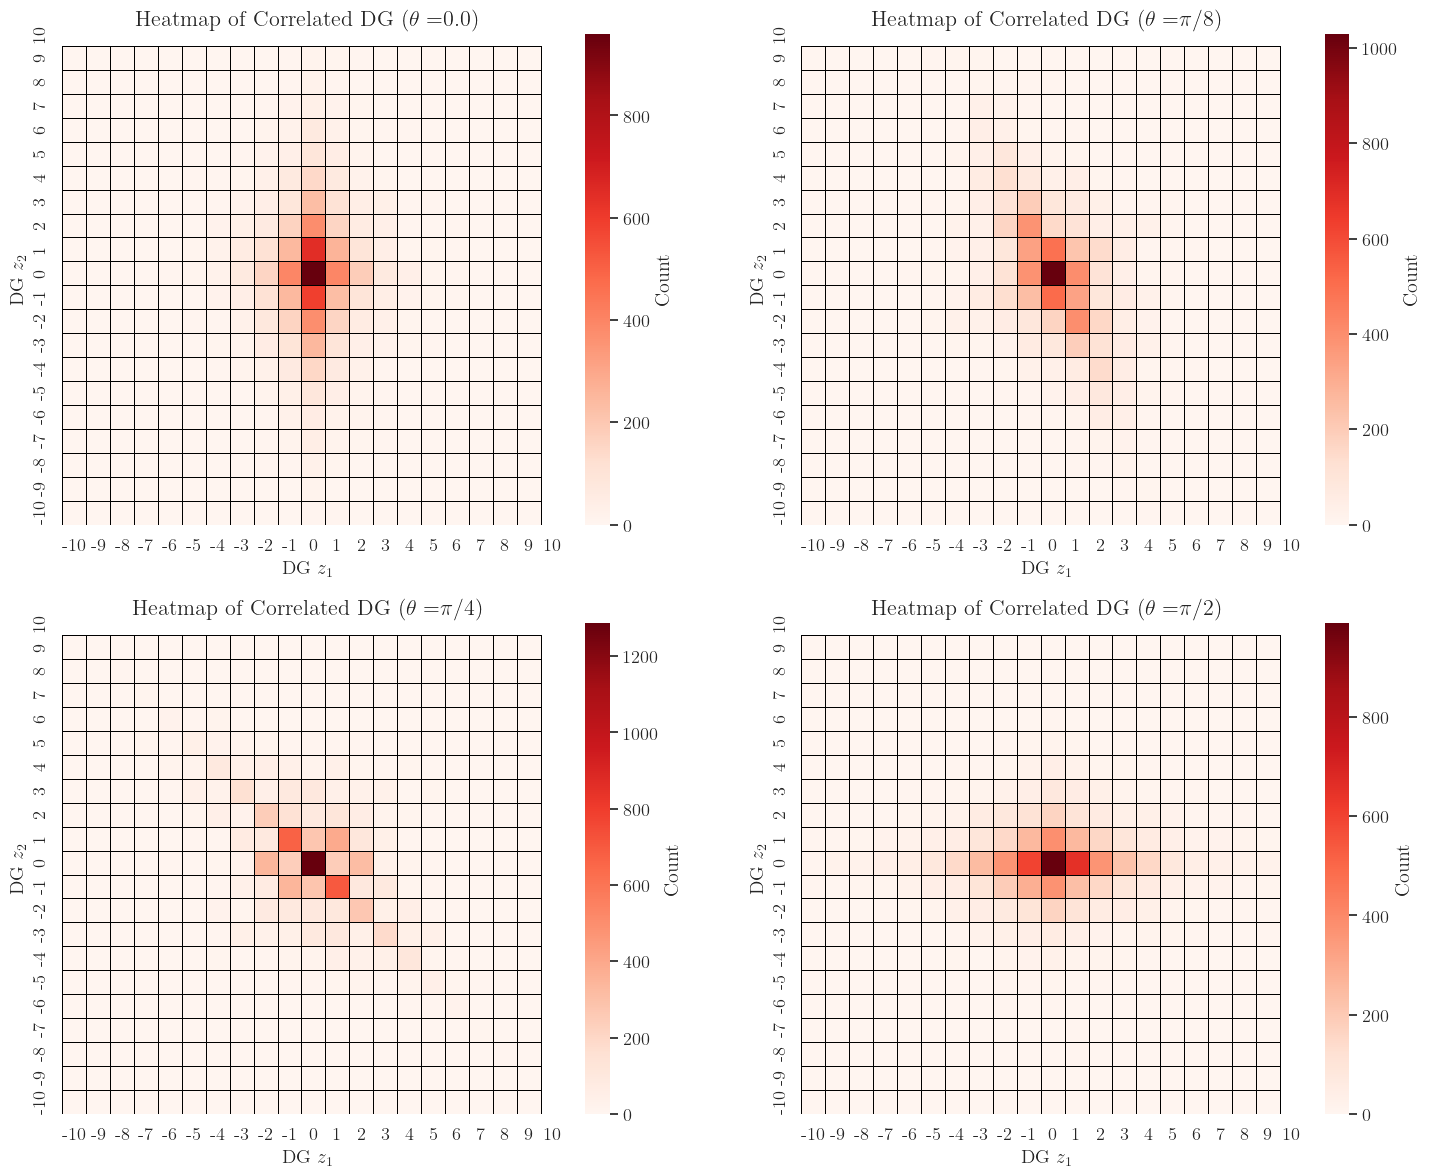

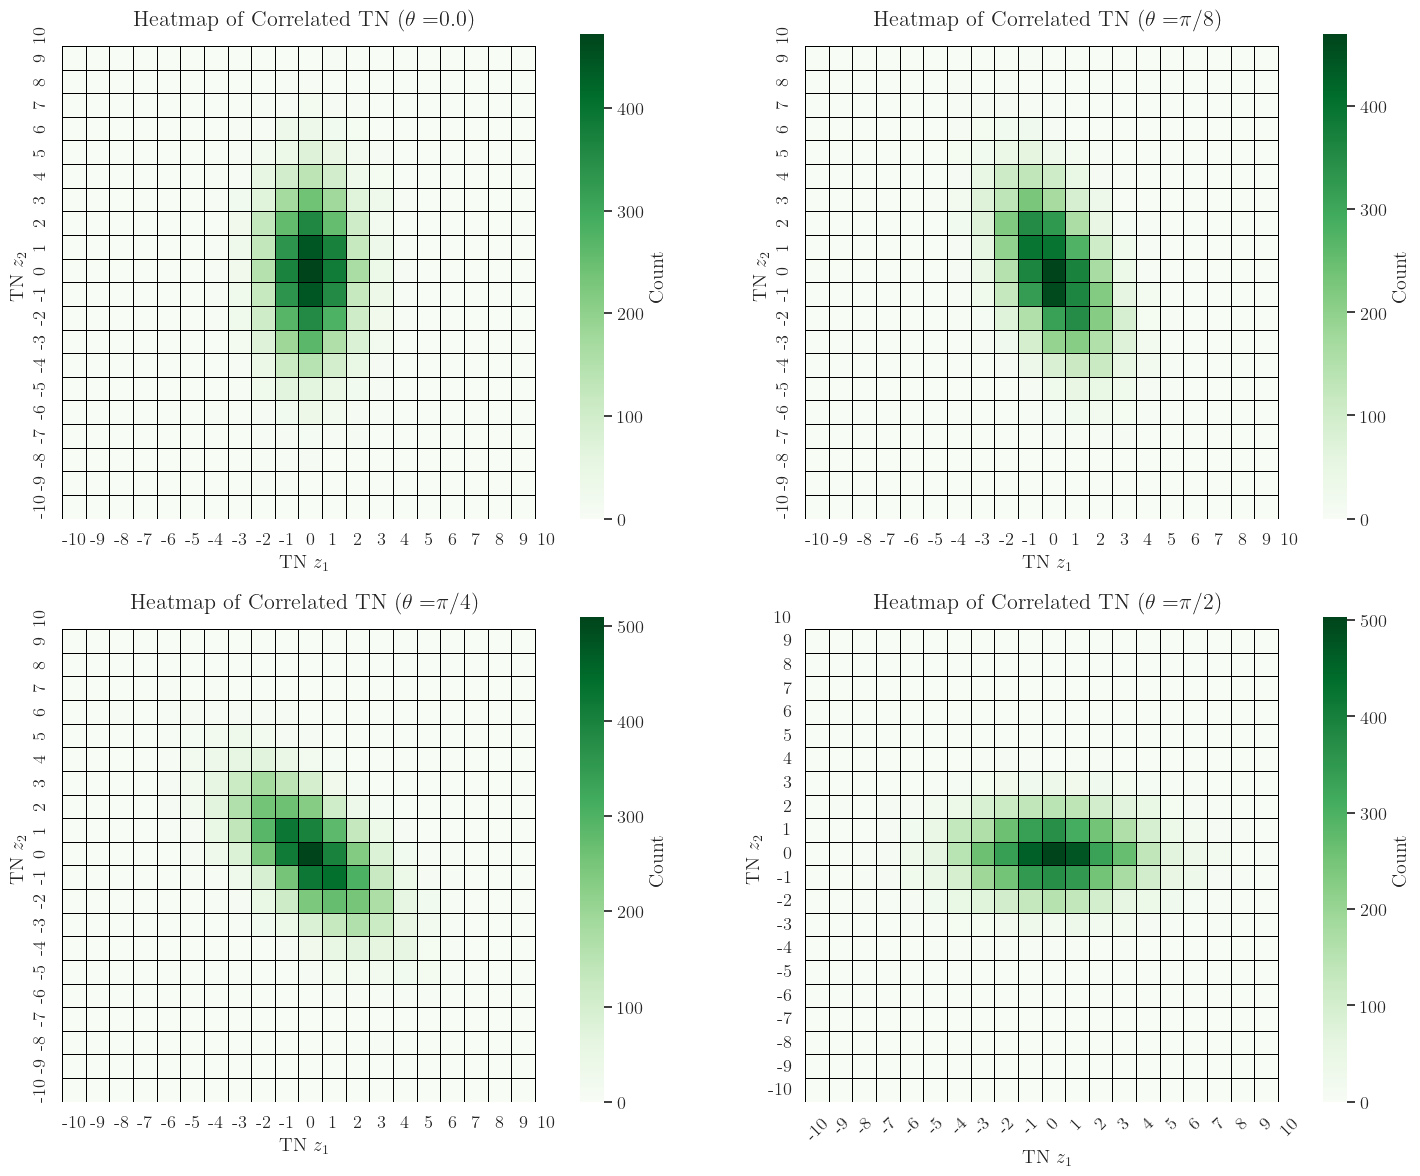

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
num_samples = 10000  # Number of samples
#
theta_values = np.array([0.0,np.pi/8,np.pi/4,np.pi/2])
theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]

S1 = 1.0 #1*np.sqrt(2.0/(np.pi))*c11 #(c11/nz) with nz=np.sqrt(2)
S2 = 2.0 #1*np.sqrt(2.0/(np.pi))*c22 #(c22/nz) with nz=np.sqrt(2)
# Set parameters for the geometric distributions - following the transformation S==>p per S=1.0 and n=2
p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )
#
c11 = np.sqrt(np.pi/2) * S1/1
c22 = np.sqrt(np.pi/2) * S2/1
# Set up plot parameters for better visibility
sns.set_theme(font_scale=1.2)  # Increase font size
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) #, subplot_kw={'projection': None})
axes = axes.flatten()
#
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))
axes3 = axes3.flatten()

for i, t in enumerate(theta_values):
    theta = np.array([t])
    DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta)

    # Create a 2D histogram for the joint distribution, with bins covering -10 to 10
    bins_range = range(-10, 11)  # Bins from -10 to 10 inclusive
    heatmap_data, x_edges, y_edges = np.histogram2d(DG_samples[:, 0], DG_samples[:, 1], bins=[bins_range, bins_range])
    # Plot heatmap
    #sns.heatmap(heatmap_data.T,cmap="Blues",cbar=True,annot=False,fmt="g",ax=axes[i],xticklabels=bins_range,yticklabels=bins_range)
    sns.heatmap(heatmap_data.T,
            cmap="Reds",  # Use a perceptually uniform colormap like 'viridis'
            cbar=True,
            annot=False,
            fmt="d",  # Use integer format for counts
            ax=axes[i],
            xticklabels=bins_range,
            yticklabels=bins_range,
            square=True,  # Ensures each heatmap cell is square-shaped
            cbar_kws={"label": "Count"},  # Add label to the colorbar
            linewidths=0.5,  # Slightly add linewidth to improve the grid visibility
            linecolor='black')  # Grid lines color
    axes[i].set_title(r"Heatmap of Correlated DG ($\theta=$"+ theta_labels[i] + ")",fontsize=16)
    axes[i].set_xlabel(r"DG $z_1$", fontsize=14)
    axes[i].set_ylabel(r"DG $z_2$", fontsize=14)
    axes[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    axes[i].invert_yaxis()  # To match the orientation of the heatmap with the axes
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    axes[i].set_facecolor('white')
    
    #
    TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples) #np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
    heatmap_data, x_edges, y_edges = np.histogram2d(TN_samples[:, 0], TN_samples[:, 1],bins=[bins_range, bins_range]) #range(-5, 5))
    #sns.heatmap(heatmap_data.T, cmap="Reds", cbar=True, annot=False, fmt="g", ax=axes3[i],xticklabels=bins_range, yticklabels=bins_range)
    sns.heatmap(heatmap_data.T,
            cmap="Greens",  # Use a perceptually uniform colormap like 'viridis'
            cbar=True,
            annot=False,
            fmt="d",  # Use integer format for counts
            ax=axes3[i],
            xticklabels=bins_range,
            yticklabels=bins_range,
            square=True,  # Ensures each heatmap cell is square-shaped
            cbar_kws={"label": "Count"},  # Add label to the colorbar
            linewidths=0.5,  # Slightly add linewidth to improve the grid visibility
            linecolor='black')  # Grid lines color
    axes3[i].set_title(r"Heatmap of Correlated TN ($\theta=$"+ theta_labels[i] + ")",fontsize=16)
    axes3[i].set_xlabel(r"TN $z_1$", fontsize=14)
    axes3[i].set_ylabel(r"TN $z_2$", fontsize=14)
    axes3[i].set_xticks(np.arange(len(bins_range)) + 0.5)
    axes3[i].set_yticks(np.arange(len(bins_range)) + 0.5)
    # axes3[i].set_xticks(x_edges[:-1] + 0.5)  # The x ticks should correspond to the center of each bin
    # axes3[i].set_yticks(y_edges[:-1] + 0.5)
    axes3[i].invert_yaxis()  # To match the orientation of the heatmap with the axes
    axes3[i].set_facecolor('white')
#     axes3[i].grid(False)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
#     plt.tight_layout()
    
    #
#     print(f"Entropy per $\theta$ = {t}")
#     print("TN: ")
#     EE.estimateEntropy(TN_samples)
#     print("DG: ")
#     EE.estimateEntropy(DG_samples)
# Adjust layout for clear visualization
fig.tight_layout()
# fig.savefig("correlatedDG.svg",format='svg')
fig3.tight_layout()
# fig3.savefig("correlatedTN.svg",format='svg')
plt.show()
